In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import datetime

import networkx as nx

In [114]:
# Read the data

courses = pd.read_csv("courses.csv", sep="	") 

plays = pd.read_csv("plays.csv", sep="	") 
likes = pd.read_csv("likes.csv", sep="	") 
clears = pd.read_csv("clears.csv", sep="	") 
players = pd.read_csv("players.csv", sep="	") 


coursemeta  = pd.read_csv("course-meta.csv", sep="	") 

#Create a new variable named date which is the day 
courses["date"] = pd.to_datetime(courses["creation"]).dt.to_period('D')
courses["date"] = courses["date"].astype(str)
courses.info()

clears["date"] = pd.to_datetime(clears["catch"]).dt.to_period('D')
clears["date"] = clears["date"].astype(str)

coursemeta["date"] = pd.to_datetime(coursemeta["catch"]).dt.to_period('D')
coursemeta["date"] = coursemeta["date"].astype(str)

#Create a new variable named date which is the day 
likes["date"] = pd.to_datetime(likes["catch"]).dt.to_period('D')
likes["date"] = likes["date"].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115032 entries, 0 to 115031
Data columns (total 9 columns):
id            115032 non-null object
difficulty    115032 non-null object
gameStyle     115032 non-null object
maker         114956 non-null object
title         115029 non-null object
thumbnail     115032 non-null object
image         115032 non-null object
creation      115032 non-null object
date          115032 non-null object
dtypes: object(9)
memory usage: 7.9+ MB


In [98]:
courses.head()

catch                   id       player
0  2018-02-23 15:22:44.015  0000-0000-0353-3D35    darter60k
1  2018-02-23 15:22:44.015  0000-0000-0353-3D35  davidchofis
2  2018-02-23 15:22:44.015  0000-0000-0353-3D35   fabioviana
3  2018-02-23 15:22:44.015  0000-0000-0353-3D35  groebenzell
4  2018-02-23 15:22:44.015  0000-0000-0353-3D35  igatake0229

In [5]:

# Select the top 15 makers by looking at how many levels they have created.
top15 = courses.groupby(["maker"]).size().nlargest(15).to_frame('size').reset_index()
top15

maker  size
0         Xavierol69   100
1           Zerodius   100
2    JustinDianaRalf    83
3            Shiraur    80
4          drmsj1983    80
5           Leeshino    69
6        N-Player2.0    69
7      quentintheret    68
8   Monkeydelphin173    67
9      SeigneurSkull    67
10         mederic39    65
11      nathanda2006    61
12          Tylano64    58
13          Giant666    57
14           thezzie    57

In [6]:
sns.set(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 13))


sns.set_color_codes("pastel")
sns.barplot(y="maker", x="size", data=top15,
            label="Total", color="b")

In [7]:
# creating a new dataframe with only the 15 top makers
counts = courses.maker.value_counts()

largest15 = counts.head(15).index

all15 = courses[courses.maker.isin(largest15)]

all15.head()

id difficulty   gameStyle      maker  \
2914  EC54-0000-033D-9402       easy  marioBrosU    thezzie   
2923  47DF-0000-0347-C773       easy   marioBros  drmsj1983   
2924  47E1-0000-0347-C759       easy   marioBros  drmsj1983   
2954  D4EA-0000-0358-0653     normal  marioBrosU   Zerodius   
3287  1875-0000-0358-0640     expert  marioBrosU   Zerodius   

                                title  \
2914                    Leaking Pipes   
2923         Bowser fights his demons   
2924                Samus kicks Shell   
2954  5-1:A "Shortcut" through Sewers   
3287   5-3:Against the Sewer Currents   

                                              thumbnail  \
2914  https://dypqnhofrd2x2.cloudfront.net/EC54-0000...   
2923  https://dypqnhofrd2x2.cloudfront.net/47DF-0000...   
2924  https://dypqnhofrd2x2.cloudfront.net/47E1-0000...   
2954  https://dypqnhofrd2x2.cloudfront.net/D4EA-0000...   
3287  https://dypqnhofrd2x2.cloudfront.net/1875-0000...   

                                                  image             creation  \
2914  https://dypqnhofrd2x2.cloudfront.net/EC54-0000...  2017-06-25 00:00:00   
2923  https://dypqnhofrd2x2.cloudfront.net/47DF-0000...  2017-07-21 00:00:00   
2924  https://dypqnhofrd2x2.cloudfront.net/47E1-0000...  2017-07-21 00:00:00   
2954  https://dypqnhofrd2x2.cloudfront.net/D4EA-0000...  2017-08-28 00:00:00   
3287  https://dypqnhofrd2x2.cloudfront.net/1875-0000...  2017-08-28 00:00:00   

            date  
2914  2017-06-25  
2923  2017-07-21  
2924  2017-07-21  
2954  2017-08-28  
3287  2017-08-28

In [8]:
#Thanks to the new df I can count only the top 15 makers and see how many levels they have made for each diffiulty

top15 = all15.groupby(["maker", "difficulty"]).size().to_frame('size').reset_index()


(ggplot(top15)
+aes(x = "maker", y = "size", fill = "difficulty")
+ geom_col(
 position='fill', color = "black", alpha = 0.9)
+ theme_minimal()
+coord_flip()
+labs(title = "In percentage", y = " %", x = "")
+theme(
    text=element_text(color='#9933FF'),
    axis_text_y=element_blank()
)) + theme_xkcd()



<ggplot: (-9223371924907797556)>

In [18]:
day_create = all15.groupby(["maker", "date"]).size().to_frame('size').reset_index()
import plotly.express as px

fig = px.scatter(day_create, x="date", y="size", color="maker",
                 size='size', hover_data=['maker'])
fig.show()

In [19]:
import plotly.graph_objects as go
import numpy as np





time_line = courses.groupby(["date"]).size().to_frame("Levels").reset_index()

fig = px.line(time_line, x="date", y="Levels", title='Levels made for each day')
fig.show()

In [20]:
testar = courses.groupby(["date"]).size().to_frame("Temp")
testar.index = pd.to_datetime(testar.index)

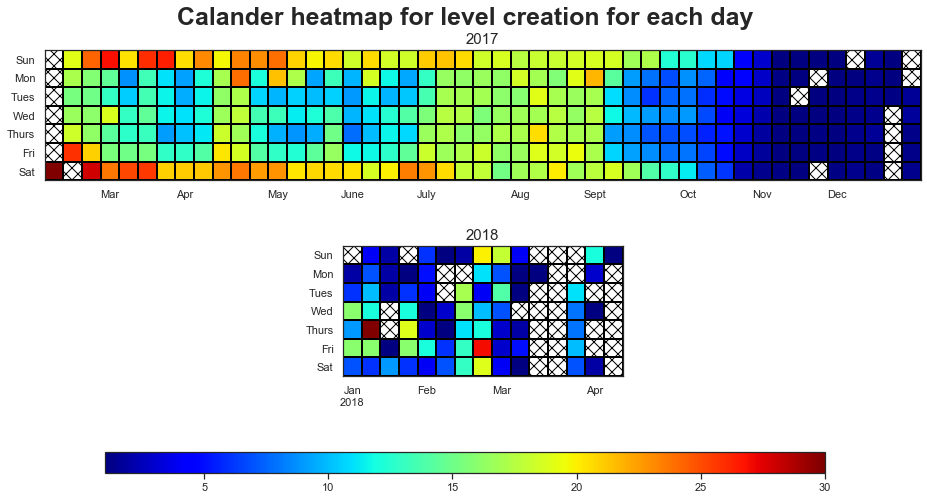

In [21]:
from matplotlib import colors

# Turn data frame to a dictionary for easy access
cal = {'2017': testar[testar.index.year == 2017], '2018': testar[testar.index.year == 2018]}

# Define Ticks
DAYS = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(2, 1, figsize = (20,6))
for i, val in enumerate(['2017', '2018']):
    start = cal.get(val).index.min()
    end = cal.get(val).index.max()
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun =  end + np.timedelta64(7 - end.dayofweek -1, 'D')


    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.full([7, num_weeks], np.nan)    
    ticks = {}
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            try:
                if date.day == 1:
                    ticks[week] = MONTHS[date.month - 1]
                if date.dayofyear == 1:
                    ticks[week] += f'\n{date.year}'
                if start <= date < end:
                    heatmap[day, week] = cal.get(val).loc[date, 'Temp']
            except:
                continue
    mesh = ax[i].pcolormesh(x, y, heatmap, cmap = 'jet', edgecolors = 'black')

    ax[i].invert_yaxis()

    # Set the ticks.
    ax[i].set_xticks(list(ticks.keys()))
    ax[i].set_xticklabels(list(ticks.values()))
    ax[i].set_yticks(np.arange(7))
    ax[i].set_yticklabels(DAYS)
    ax[i].set_ylim(6.5,-0.5)
    ax[i].set_aspect('equal')
    ax[i].set_title(val, fontsize = 15)

    # Hatch for out of bound values in a year
    ax[i].patch.set(hatch='xx', edgecolor='black')

# Add color bar at the bottom
cbar_ax = fig.add_axes([0.25, -0.10, 0.5, 0.05])
fig.colorbar(mesh, orientation="horizontal", pad=0.2, cax = cbar_ax)
colorbar = ax[1].collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
fig.suptitle('Calander heatmap for level creation for each day', fontweight = 'bold', fontsize = 25)
fig.subplots_adjust(hspace = 0.5)

In [23]:
# Now I will try anbd create a network graph 
# Here I merge maker into the dataframe that cointains all the plays
lol = plays.join(courses.set_index('id')[['maker']], on='id')


lol2 = lol.groupby(["player", "maker"]).size().to_frame('n').reset_index()
#filter so that only players that played more than 45 times are met
lol2 = lol2[lol2['n']>50]

lol2

player             maker   n
172315         AmiralGabe        Xavierol69  52
222497           Basilika     quentintheret  52
289491          Capt.Dad2          Zerodius  53
671252         KAITO99999           Shiraur  51
889728           Mrwise90          Zerodius  81
894791            Myhtra2          Tylano64  52
910067         Naso1979BG          Handrick  52
957091        OwsleyArdor          Zerodius  86
973117         PattTrich1        Xavierol69  59
991785    Plusbellelavie5          Tylano64  53
995385      PopTevin20049          Zerodius  86
1020645  RURI333HRIRU777H          Handrick  55
1020721  RURI333HRIRU777H        Xavierol69  65
1146980    SpeedrunRobban  Monkeydelphin173  60
1202619            Tchad7          Tylano64  53
1235920          Timridge          Leeshino  65
1310117        Xavierol69           Shiraur  79
1432298        andreaesse        Xavierol69  69
1666244   christianwalter     quentintheret  52
1686812         coeur2017         mederic39  55
1702791        cowboye123         mederic39  57
1713107        csgdgdhh14          Tylano64  53
1927550           fsgyb24          Tylano64  52
1954229  ganymede_lobster        Xavierol69  58
1970005          ghjgko84          Tylano64  56
2008089            gutio7          Zerodius  54
2062811         henmpotvi  Monkeydelphin173  64
2068413           hhrerui          Tylano64  55
2142586        indien1966         mederic39  63
2142590        indien1966     quentintheret  60
2405686           kktyulp     quentintheret  59
2426214   koopa-troopa942          Zerodius  85
2477133       lamotte1982           Shiraur  53
2692640       mhscx.n-8q9          Tylano64  52
2874705        nonom52100        Xavierol69  52
3013908          quinten9     quentintheret  52
3251946            sioux4         mederic39  53
3415844          tc.coeur         mederic39  54
3445777           thezzie         drmsj1983  80
3461118          tjrgg.yy          Tylano64  53
3631465       yarisanda05          Giant666  56

C:\Users\GTSA - Infinity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



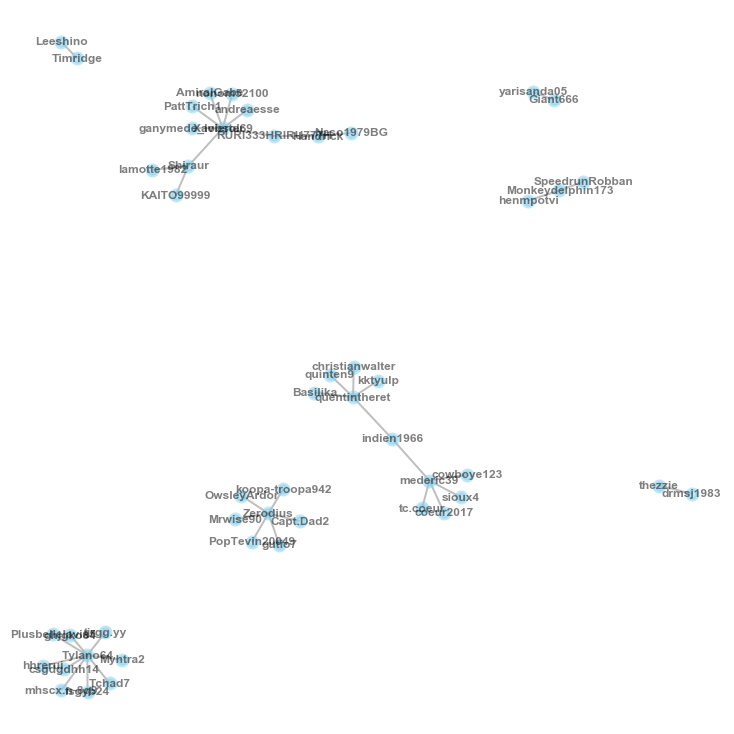

In [24]:


# Build your graph
G=nx.from_pandas_edgelist(lol2, 'maker', 'player')
plt.figure(3,figsize=(10,10)) # makes the graph bigger
# All together we can do something fancy
nx.draw(G, with_labels=True, node_size=100, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4, font_size=12, font_color="black", font_weight="bold", width=2, edge_color="grey")

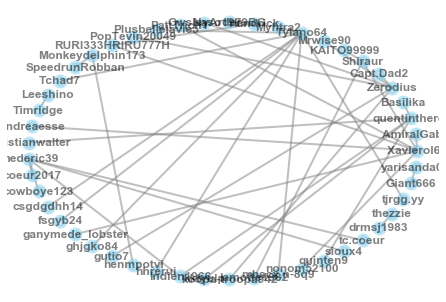

In [25]:
nx.draw_shell(G, with_labels=True, node_size=100, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4, font_size=12, font_color="black", font_weight="bold", width=2, edge_color="grey")

In [27]:
# Group by difficulty 

svår = courses.groupby(["difficulty"]).size().to_frame('n').reset_index()
svår = svår.sort_values(by = ['n'], ascending=False).reset_index(drop=True)

In [33]:
# Gör om till date time
from datetime import datetime
year_df = courses.groupby(["difficulty", "date"]).size().to_frame('n').reset_index()
year_df['Datetime'] = pd.to_datetime(year_df['date'], format="%Y-%m-%d")
year_easy = year_df[year_df["difficulty"] == "easy"]
year_normal = year_df[year_df["difficulty"] == "normal"]
year_expert = year_df[year_df["difficulty"] == "expert"]
year_Sup_expert = year_df[year_df["difficulty"] == "superExpert"]

NameError: name 'year_df' is not defined

Text(0.5, 1.0, 'Super expert')

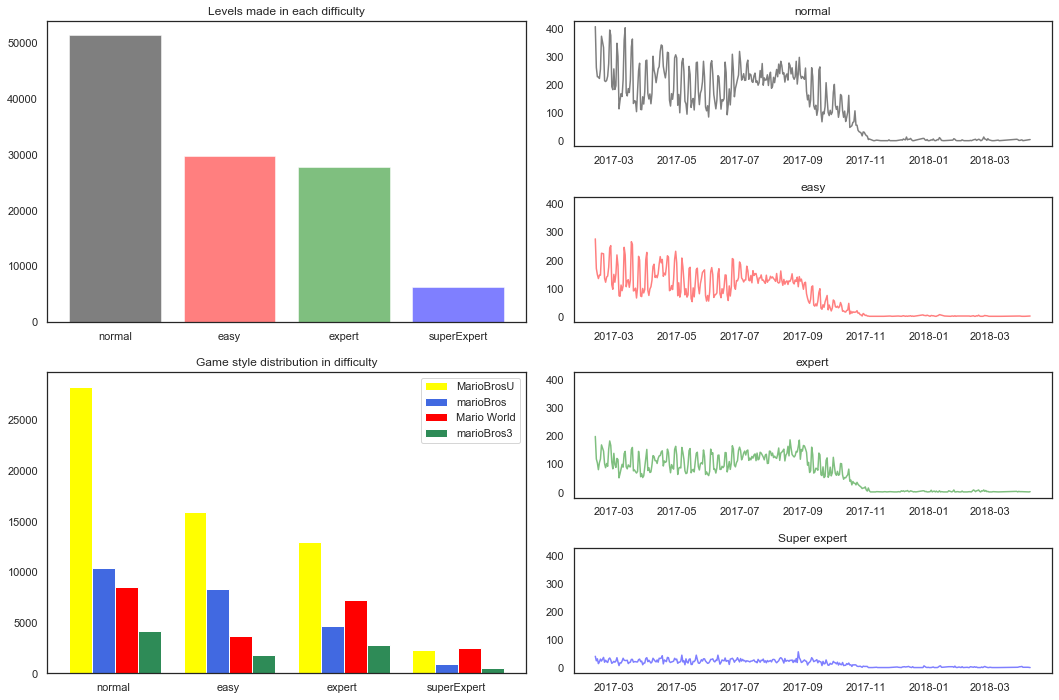

In [34]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html



marioBros = (10368, 8369, 4709, 896)
marioBros3 = (4164, 1766, 2821, 567)
marioBrosU = (28317, 15925, 12964, 2258)
marioWorld = (8505, 3632, 7259, 2512)


N = 4


ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars



fig = plt.figure(figsize=(18, 12))

grid = plt.GridSpec(4, 2, wspace=0.1, hspace=0.4)


x = np.linspace(0, 8, 1000)
up_left = plt.subplot(grid[:2, 0])  #upper left
down_left = plt.subplot(grid[2:4, 0])

nr1 = plt.subplot(grid[0, 1], xticklabels=[])
nr2 = plt.subplot(grid[1, 1], sharex= nr1, sharey = nr1)
nr3 = plt.subplot(grid[2, 1], sharex= nr1, sharey = nr1)
nr4 = plt.subplot(grid[3, 1], sharey = nr1);

up_left.bar(svår["difficulty"], svår["n"], align='center', alpha=0.5, color=['black', 'red', 'green', 'blue'])
up_left.set_title('Levels made in each difficulty')

down_left.bar(ind,marioBrosU, width, color='yellow' )
down_left.bar(ind+width,marioBros, width, color='royalblue')
down_left.bar(ind+width*2,marioWorld, width, color='red')
down_left.bar(ind+width*3,marioBros3, width, color='seagreen')

down_left.set_xticks(ind + width / 0.7)
down_left.set_xticklabels( ('normal', 'easy', 'expert', 'superExpert') )
down_left.legend( ('MarioBrosU', 'marioBros', "Mario World", "marioBros3") )
down_left.set_title('Game style distribution in difficulty')

nr1.plot(year_normal["Datetime"], year_normal["n"], alpha=0.5, color = "black" )
nr1.set_title('normal')

nr2.plot(year_easy["Datetime"], year_easy["n"], alpha=0.5, color = "red" )
nr2.set_title('easy')

nr3.plot(year_expert["Datetime"], year_expert["n"], alpha=0.5, color = "green" )
nr3.set_title('expert')


nr4.plot(year_Sup_expert["Datetime"], year_Sup_expert["n"], alpha=0.5, color = "blue" )
nr4.set_title('Super expert')


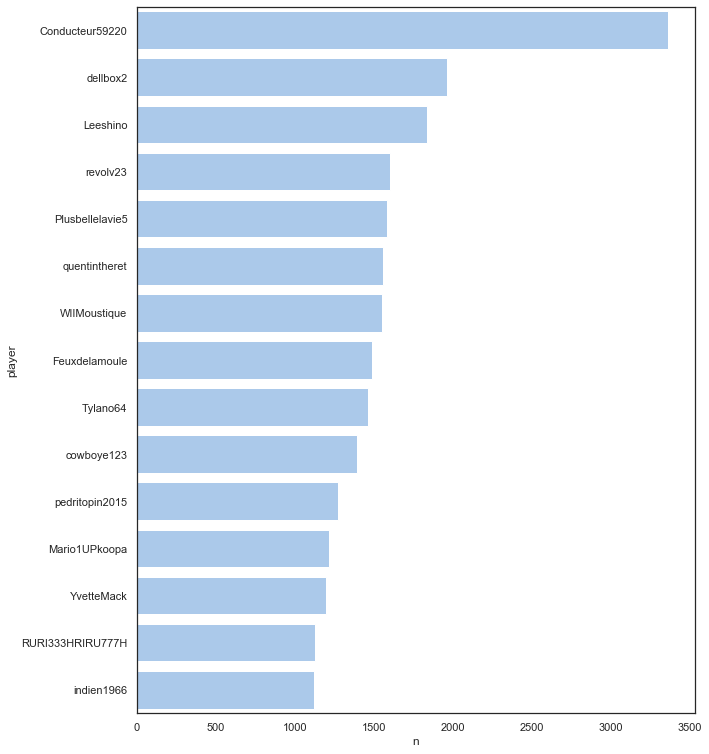

In [36]:
# creating a new dataframe with only the 15 top makers
counts_like = likes.player.value_counts()

largest15_like = counts_like.head(15).index
top_likes = likes[likes.player.isin(largest15_like)]

top15_likes = likes.groupby(["player"]).size().nlargest(15).to_frame('n').reset_index()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 13))


sns.set_color_codes("pastel")
sns.barplot(y="player", x="n", data=top15_likes,
            label="Total", color="b")


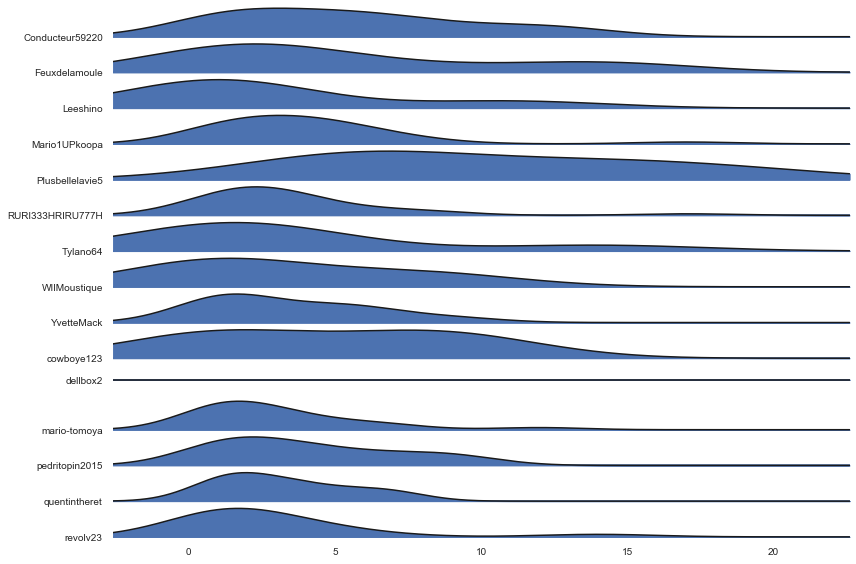

In [38]:
likes_day = top_likes.groupby(["player", "date"]).size().to_frame('size').reset_index()

likes_day = likes_day[likes_day["size"] < 20]


import joypy
%matplotlib inline

fig, axes = joypy.joyplot(likes_day , by="player", column="size", bins=20, overlap=0,
                          grid=False, legend=False,ylim='own', figsize=(12,8))


In [39]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(likes_day, row="player", hue="player", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "size", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "size", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "size")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [41]:
 
# Here I merge maker into the dataframe that cointains all the plays
lol = likes.join(courses.set_index('id')[['difficulty']], on='id')
lol = lol.join(courses.set_index('id')[['gameStyle']], on='id')


lol_diff = lol.groupby(["difficulty"]).size().to_frame('n').reset_index()
lol_diff = lol_diff.sort_values(by = ['n'], ascending=False).reset_index(drop=True)
lol_diff

lol_style = lol.groupby(["gameStyle"]).size().to_frame('n').reset_index()
lol_style = lol_style.sort_values(by = ['n'], ascending=False).reset_index(drop=True)
lol_style

gameStyle       n
0  marioBrosU  252861
1   marioBros  153551
2  marioWorld  146932
3  marioBros3   65343

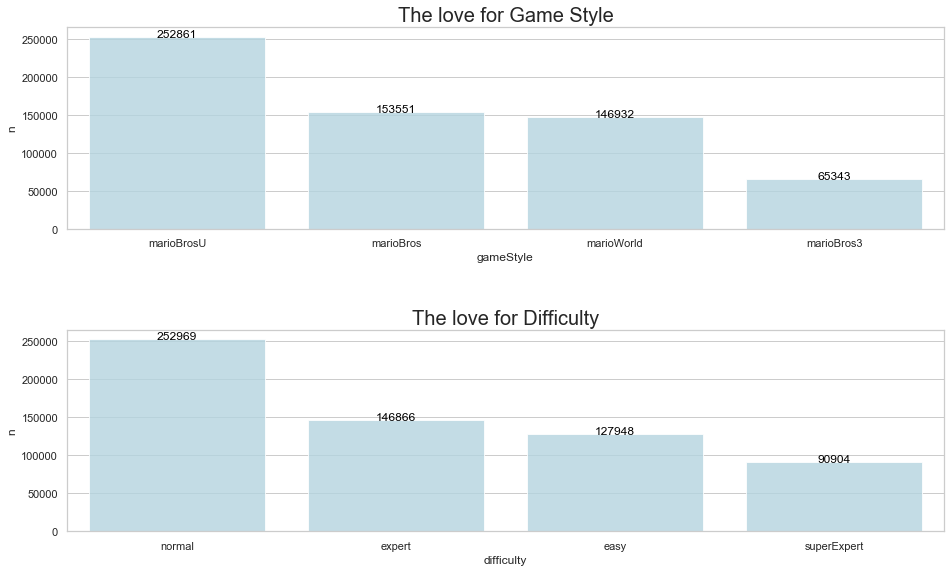

In [94]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=2)

plt.subplots_adjust(hspace = 0.5)

fig.set_size_inches(15.7, 9.27)

g= sns.barplot("gameStyle", y="n", data=lol_style, color = "lightblue", ax=axs[0], alpha=0.8)
g.set_title("The love for Game Style", size = 20)
for index, row in lol_style.iterrows():
    g.text(row.name,row.n, round(row.n,2), color='black', ha="center")
    
    
g = sns.barplot("difficulty", y="n", data=lol_diff, color = "lightblue", ax=axs[1], alpha=0.8)
g.set_title("The love for Difficulty", size = 20)
for index, row in lol_diff.iterrows():
    g.text(row.name,row.n, round(row.n,2), color='black', ha="center")



In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)
# Use textposition='auto' for direct text
fig.add_trace(
    go.Bar(x= svår["difficulty"], y= svår["n"], text=svår["n"], textposition='auto'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=year_df["date"], y=year_df["n"]),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

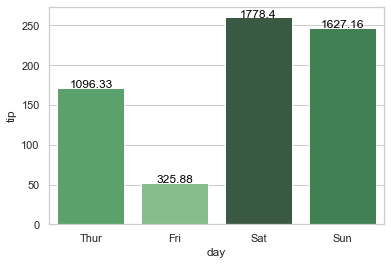

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
g=sns.barplot(x='day',y='tip',data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.show()

In [55]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [57]:
groupedvalues

day  total_bill     tip  size
0  Thur     1096.33  171.83   152
1   Fri      325.88   51.96    40
2   Sat     1778.40  260.40   219
3   Sun     1627.16  247.39   216

In [15]:
# Select the top 15 makers by looking at how many levels they have created.
top15 = clears.groupby(["player"]).size().nlargest(15).to_frame('size').reset_index()

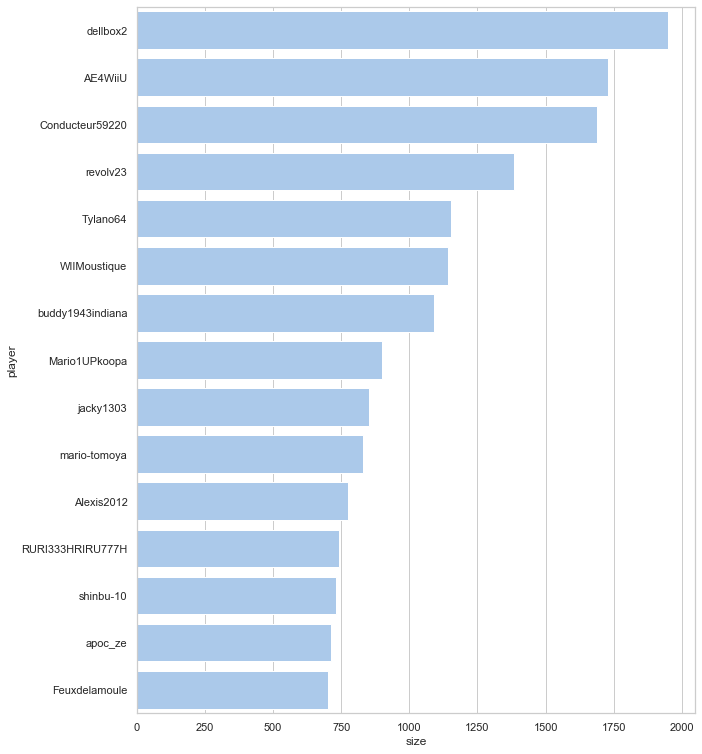

In [16]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 13))


sns.set_color_codes("pastel")
sns.barplot(y="player", x="size", data=top15,
            label="Total", color="b")




In [17]:
#Thanks to the new df I can count only the top 15 makers and see how many levels they have made for each diffiulty
# creating a new dataframe with only the 15 top makers
counts = clears.player.value_counts()

largest15 = counts.head(15).index

all15 = clears[clears.player.isin(largest15)]

all15
#top15 = all15.groupby(["player", "difficulty"]).size().to_frame('size').reset_index()

all15 = all15.join(courses.set_index('id')[['difficulty']], on='id')
all15 
#top15


catch                   id            player  \
121       2017-12-18 14:47:52.16  0004-0000-0333-88D7           apoc_ze   
264       2017-12-18 14:47:59.98  000D-0000-035E-0B6F          dellbox2   
288      2017-12-18 14:48:02.654  000E-0000-0331-2D8D   Conducteur59220   
350      2018-03-02 09:46:45.509  000E-0000-0331-FD04        Alexis2012   
386      2018-03-02 09:46:47.227  000F-0000-0367-8657          revolv23   
...                          ...                  ...               ...   
2050538  2018-02-23 15:06:25.094  FFCF-0000-0358-3895          Tylano64   
2051117  2018-02-23 15:06:46.099  FFE5-0000-0341-9A27           AE4WiiU   
2051330  2018-03-02 10:07:46.932  FFEE-0000-0321-0545          revolv23   
2051403  2017-12-18 16:13:06.218  FFF2-0000-032B-6FC3  buddy1943indiana   
2051660  2018-02-23 15:07:11.258  FFFB-0000-031F-40E7      WIIMoustique   

               date difficulty  
121      2017-12-18       easy  
264      2017-12-18     expert  
288      2017-12-18     normal  
350      2018-03-02     normal  
386      2018-03-02     expert  
...             ...        ...  
2050538  2018-02-23     normal  
2051117  2018-02-23     expert  
2051330  2018-03-02     normal  
2051403  2017-12-18       easy  
2051660  2018-02-23     normal  

[16377 rows x 5 columns]

In [18]:

top15 = all15.groupby(["player", "difficulty"]).size().to_frame('size').reset_index()

(ggplot(top15)
+aes(x = "player", y = "size", fill = "difficulty")
+ geom_col(
 position='fill', color = "black", alpha = 0.9)
+ theme_minimal()
+coord_flip()
+labs(title = "In percentage", y = " %", x = "")
+theme(
    text=element_text(color='#9933FF'),
    axis_text_y=element_blank()
)) + theme_xkcd()

<ggplot: (-9223371924911099940)>

## Do people that play also give likes?

This will 

In [36]:
df = clears.groupby(["player"]).size().to_frame('size').reset_index()
loveall = likes .groupby(["player"]).size().to_frame('size2').reset_index()

In [41]:
loveplay = df.join(loveall.set_index('player')[['size2']], on='player')

In [51]:
(ggplot(loveplay)
+aes(x = "size", y = "size2") 
+ geom_point(alpha = 0.3)
+ theme_minimal()
+labs(title = "In percentage", y = " %", x = "")
+geom_smooth()
+theme(
    text=element_text(),
    axis_text_y=element_blank()
))

C:\Users\GTSA - Infinity\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\GTSA - Infinity\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 477872 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


<ggplot: (-9223371924885511420)>

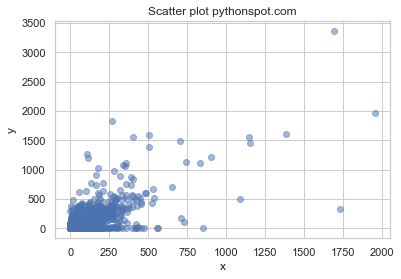

In [53]:
plt.scatter(loveplay["size"], loveplay["size2"], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


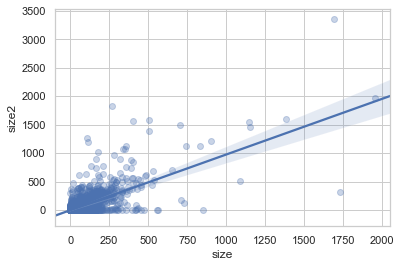

In [57]:
sns.regplot(x="size", y="size2", data=loveplay, scatter_kws={'alpha':0.3})

In [58]:
testar = clears.groupby(["date"]).size().to_frame("Temp")
testar.index = pd.to_datetime(testar.index)

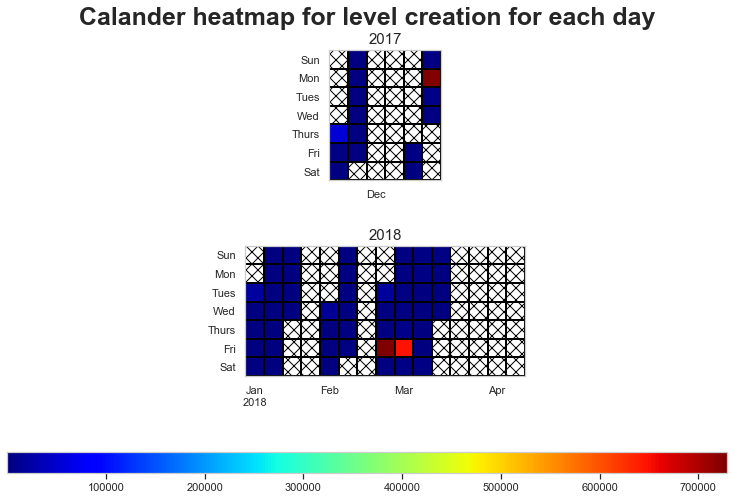

In [59]:
from matplotlib import colors

# Turn data frame to a dictionary for easy access
cal = {'2017': testar[testar.index.year == 2017], '2018': testar[testar.index.year == 2018]}

# Define Ticks
DAYS = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(2, 1, figsize = (20,6))
for i, val in enumerate(['2017', '2018']):
    start = cal.get(val).index.min()
    end = cal.get(val).index.max()
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun =  end + np.timedelta64(7 - end.dayofweek -1, 'D')


    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.full([7, num_weeks], np.nan)    
    ticks = {}
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            try:
                if date.day == 1:
                    ticks[week] = MONTHS[date.month - 1]
                if date.dayofyear == 1:
                    ticks[week] += f'\n{date.year}'
                if start <= date < end:
                    heatmap[day, week] = cal.get(val).loc[date, 'Temp']
            except:
                continue
    mesh = ax[i].pcolormesh(x, y, heatmap, cmap = 'jet', edgecolors = 'black')

    ax[i].invert_yaxis()

    # Set the ticks.
    ax[i].set_xticks(list(ticks.keys()))
    ax[i].set_xticklabels(list(ticks.values()))
    ax[i].set_yticks(np.arange(7))
    ax[i].set_yticklabels(DAYS)
    ax[i].set_ylim(6.5,-0.5)
    ax[i].set_aspect('equal')
    ax[i].set_title(val, fontsize = 15)

    # Hatch for out of bound values in a year
    ax[i].patch.set(hatch='xx', edgecolor='black')

# Add color bar at the bottom
cbar_ax = fig.add_axes([0.25, -0.10, 0.5, 0.05])
fig.colorbar(mesh, orientation="horizontal", pad=0.2, cax = cbar_ax)
colorbar = ax[1].collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
fig.suptitle('Calander heatmap for level creation for each day', fontweight = 'bold', fontsize = 25)
fig.subplots_adjust(hspace = 0.5)

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Creating a world map
testar = players.groupby(["flag"]).size().to_frame("size").reset_index()

In [68]:
testar

flag  size
0    AG     8
1    AI    43
2    AN    12
3    AR   466
4    AT  5175
..  ...   ...
77   VC     1
78   VE   740
79   VG    16
80   VI    45
81   ZA   132

[82 rows x 2 columns]

In [72]:
convert_ISO_3166_2_to_1 = {
'AF':'AFG',
'AX':'ALA',
'AL':'ALB',
'DZ':'DZA',
'AS':'ASM',
'AD':'AND',
'AO':'AGO',
'AI':'AIA',
'AQ':'ATA',
'AG':'ATG',
'AR':'ARG',
'AM':'ARM',
'AW':'ABW',
'AU':'AUS',
'AT':'AUT',
'AZ':'AZE',
'BS':'BHS',
'BH':'BHR',
'BD':'BGD',
'BB':'BRB',
'BY':'BLR',
'BE':'BEL',
'BZ':'BLZ',
'BJ':'BEN',
'BM':'BMU',
'BT':'BTN',
'BO':'BOL',
'BA':'BIH',
'BW':'BWA',
'BV':'BVT',
'BR':'BRA',
'IO':'IOT',
'BN':'BRN',
'BG':'BGR',
'BF':'BFA',
'BI':'BDI',
'KH':'KHM',
'CM':'CMR',
'CA':'CAN',
'CV':'CPV',
'KY':'CYM',
'CF':'CAF',
'TD':'TCD',
'CL':'CHL',
'CN':'CHN',
'CX':'CXR',
'CC':'CCK',
'CO':'COL',
'KM':'COM',
'CG':'COG',
'CD':'COD',
'CK':'COK',
'CR':'CRI',
'CI':'CIV',
'HR':'HRV',
'CU':'CUB',
'CY':'CYP',
'CZ':'CZE',
'DK':'DNK',
'DJ':'DJI',
'DM':'DMA',
'DO':'DOM',
'EC':'ECU',
'EG':'EGY',
'SV':'SLV',
'GQ':'GNQ',
'ER':'ERI',
'EE':'EST',
'ET':'ETH',
'FK':'FLK',
'FO':'FRO',
'FJ':'FJI',
'FI':'FIN',
'FR':'FRA',
'GF':'GUF',
'PF':'PYF',
'TF':'ATF',
'GA':'GAB',
'GM':'GMB',
'GE':'GEO',
'DE':'DEU',
'GH':'GHA',
'GI':'GIB',
'GR':'GRC',
'GL':'GRL',
'GD':'GRD',
'GP':'GLP',
'GU':'GUM',
'GT':'GTM',
'GG':'GGY',
'GN':'GIN',
'GW':'GNB',
'GY':'GUY',
'HT':'HTI',
'HM':'HMD',
'VA':'VAT',
'HN':'HND',
'HK':'HKG',
'HU':'HUN',
'IS':'ISL',
'IN':'IND',
'ID':'IDN',
'IR':'IRN',
'IQ':'IRQ',
'IE':'IRL',
'IM':'IMN',
'IL':'ISR',
'IT':'ITA',
'JM':'JAM',
'JP':'JPN',
'JE':'JEY',
'JO':'JOR',
'KZ':'KAZ',
'KE':'KEN',
'KI':'KIR',
'KP':'PRK',
'KR':'KOR',
'KW':'KWT',
'KG':'KGZ',
'LA':'LAO',
'LV':'LVA',
'LB':'LBN',
'LS':'LSO',
'LR':'LBR',
'LY':'LBY',
'LI':'LIE',
'LT':'LTU',
'LU':'LUX',
'MO':'MAC',
'MK':'MKD',
'MG':'MDG',
'MW':'MWI',
'MY':'MYS',
'MV':'MDV',
'ML':'MLI',
'MT':'MLT',
'MH':'MHL',
'MQ':'MTQ',
'MR':'MRT',
'MU':'MUS',
'YT':'MYT',
'MX':'MEX',
'FM':'FSM',
'MD':'MDA',
'MC':'MCO',
'MN':'MNG',
'ME':'MNE',
'MS':'MSR',
'MA':'MAR',
'MZ':'MOZ',
'MM':'MMR',
'NA':'NAM',
'NR':'NRU',
'NP':'NPL',
'NL':'NLD',
'AN':'ANT',
'NC':'NCL',
'NZ':'NZL',
'NI':'NIC',
'NE':'NER',
'NG':'NGA',
'NU':'NIU',
'NF':'NFK',
'MP':'MNP',
'NO':'NOR',
'OM':'OMN',
'PK':'PAK',
'PW':'PLW',
'PS':'PSE',
'PA':'PAN',
'PG':'PNG',
'PY':'PRY',
'PE':'PER',
'PH':'PHL',
'PN':'PCN',
'PL':'POL',
'PT':'PRT',
'PR':'PRI',
'QA':'QAT',
'RE':'REU',
'RO':'ROU',
'RU':'RUS',
'RW':'RWA',
'BL':'BLM',
'SH':'SHN',
'KN':'KNA',
'LC':'LCA',
'MF':'MAF',
'PM':'SPM',
'VC':'VCT',
'WS':'WSM',
'SM':'SMR',
'ST':'STP',
'SA':'SAU',
'SN':'SEN',
'RS':'SRB',
'SC':'SYC',
'SL':'SLE',
'SG':'SGP',
'SK':'SVK',
'SI':'SVN',
'SB':'SLB',
'SO':'SOM',
'ZA':'ZAF',
'GS':'SGS',
'ES':'ESP',
'LK':'LKA',
'SD':'SDN',
'SR':'SUR',
'SJ':'SJM',
'SZ':'SWZ',
'SE':'SWE',
'CH':'CHE',
'SY':'SYR',
'TW':'TWN',
'TJ':'TJK',
'TZ':'TZA',
'TH':'THA',
'TL':'TLS',
'TG':'TGO',
'TK':'TKL',
'TO':'TON',
'TT':'TTO',
'TN':'TUN',
'TR':'TUR',
'TM':'TKM',
'TC':'TCA',
'TV':'TUV',
'UG':'UGA',
'UA':'UKR',
'AE':'ARE',
'GB':'GBR',
'US':'USA',
'UM':'UMI',
'UY':'URY',
'UZ':'UZB',
'VU':'VUT',
'VE':'VEN',
'VN':'VNM',
'VG':'VGB',
'VI':'VIR',
'WF':'WLF',
'EH':'ESH',
'YE':'YEM',
'ZM':'ZMB',
'ZW':'ZWE'
}


convert_ISO_3166_2_to_1

{'AF': 'AFG',
 'AX': 'ALA',
 'AL': 'ALB',
 'DZ': 'DZA',
 'AS': 'ASM',
 'AD': 'AND',
 'AO': 'AGO',
 'AI': 'AIA',
 'AQ': 'ATA',
 'AG': 'ATG',
 'AR': 'ARG',
 'AM': 'ARM',
 'AW': 'ABW',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BS': 'BHS',
 'BH': 'BHR',
 'BD': 'BGD',
 'BB': 'BRB',
 'BY': 'BLR',
 'BE': 'BEL',
 'BZ': 'BLZ',
 'BJ': 'BEN',
 'BM': 'BMU',
 'BT': 'BTN',
 'BO': 'BOL',
 'BA': 'BIH',
 'BW': 'BWA',
 'BV': 'BVT',
 'BR': 'BRA',
 'IO': 'IOT',
 'BN': 'BRN',
 'BG': 'BGR',
 'BF': 'BFA',
 'BI': 'BDI',
 'KH': 'KHM',
 'CM': 'CMR',
 'CA': 'CAN',
 'CV': 'CPV',
 'KY': 'CYM',
 'CF': 'CAF',
 'TD': 'TCD',
 'CL': 'CHL',
 'CN': 'CHN',
 'CX': 'CXR',
 'CC': 'CCK',
 'CO': 'COL',
 'KM': 'COM',
 'CG': 'COG',
 'CD': 'COD',
 'CK': 'COK',
 'CR': 'CRI',
 'CI': 'CIV',
 'HR': 'HRV',
 'CU': 'CUB',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DK': 'DNK',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DO': 'DOM',
 'EC': 'ECU',
 'EG': 'EGY',
 'SV': 'SLV',
 'GQ': 'GNQ',
 'ER': 'ERI',
 'EE': 'EST',
 'ET': 'ETH',
 'FK': 'FLK',
 'FO': 'FRO',
 'FJ':

In [81]:
ho = pd.DataFrame.from_dict(convert_ISO_3166_2_to_1,orient='index').unstack().reset_index()
ho["level_1"]

0      AF
1      AX
2      AL
3      DZ
4      AS
       ..
241    WF
242    EH
243    YE
244    ZM
245    ZW
Name: level_1, Length: 246, dtype: object

In [83]:
testar = testar.join(ho.set_index('level_1'), on='flag')

In [85]:
testar[0]

0     ATG
1     AIA
2     ANT
3     ARG
4     AUT
     ... 
77    VCT
78    VEN
79    VGB
80    VIR
81    ZAF
Name: 0, Length: 82, dtype: object

In [105]:
data = [ dict(
        type = 'choropleth',
        locations = testar[0],
        z = testar["size"],
        locationmode = 'ISO-3',
        text = testar[0],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = ' Hejsan',
    height=700, margin={"r":0,"t":50,"l":0,"b":0},
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
    
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)

In [125]:
meta = coursemeta.join(courses.set_index('id')[['difficulty']], on='id')

In [116]:
meta


catch                   id       firstClear  tag  \
0       2017-11-16 14:45:36.703  079D-0000-0351-17E2          SGK2017  NaN   
1       2017-11-16 14:45:38.342  07CD-0000-030D-EA60      emerson1312  NaN   
2       2017-11-16 14:45:40.259  07F7-0000-030F-A51B       jacobrw420  NaN   
3       2017-11-16 14:45:42.023  080E-0000-0307-A394  Alef_Nascimento  NaN   
4       2017-11-16 14:45:43.414  082F-0000-0358-A218      Thunder8966  NaN   
...                         ...                  ...              ...  ...   
292293  2018-04-10 11:26:16.261  03F8-0000-0337-AC02      SegaMegaMan  NaN   
292294  2018-04-10 11:26:59.971  03F8-0000-035A-ABBF        ssgss0929  NaN   
292295  2018-04-10 11:27:05.216  03FA-0000-034B-3B20              NaN  NaN   
292296  2018-04-10 11:28:26.403  0402-0000-02FF-5301        msat-mori  NaN   
292297   2018-04-10 11:29:38.36  0402-0000-0311-84B2         timur006  NaN   

        stars  players  tweets  clears  attempts  clearRate        date  \
0           1       16       0       2        58       3.44  2017-11-16   
1           1       22       0       2       120       1.66  2017-11-16   
2           9       69       0       7       903       0.77  2017-11-16   
3           2       27       0       4        93       4.30  2017-11-16   
4           1       11       0       2        19      10.52  2017-11-16   
...       ...      ...     ...     ...       ...        ...         ...   
292293      7       43       0       6       314       1.91  2018-04-10   
292294      3       25       0       5       114       4.38  2018-04-10   
292295      2       30       0       0       425       0.00  2018-04-10   
292296      1       32       0      25        57      43.85  2018-04-10   
292297      3       40       0      39        44      88.63  2018-04-10   

         difficulty  
0            expert  
1            expert  
2       superExpert  
3            expert  
4            normal  
...             ...  
292293  superExpert  
292294       expert  
292295  superExpert  
292296         easy  
292297         easy  

[292298 rows x 12 columns]

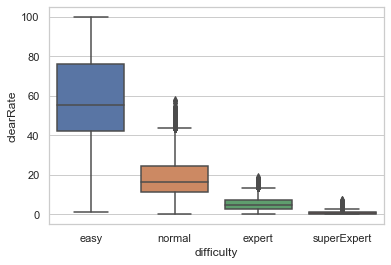

In [128]:


sns.boxplot(x="difficulty", y="clearRate", data=meta, order=["easy","normal","expert","superExpert"])

AttributeError: 'Line2D' object has no property 'hue'

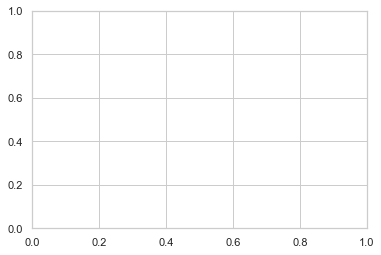

In [136]:
sns.kdeplot(meta["clearRate"], hue = meta["difficulty"])

In [137]:
 sns.kdeplot(meta["clearRate"], c = colorUp(meta["difficulty"]))

NameError: name 'colorUp' is not defined

In [ ]:
(ggplot(top15)
+aes(x = "maker", y = "size", fill = "difficulty")
+ geom_col(
 position='fill', color = "black", alpha = 0.9)
+ theme_minimal()
+coord_flip()
+labs(title = "In percentage", y = " %", x = "")
+theme(
    text=element_text(color='#9933FF'),
    axis_text_y=element_blank()
)) + theme_xkcd()